## Load and Preprocess the Data

    Handling missing values
    Encoding categorical variables
    Normalizing numerical columns
    Creating engineered features

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("tour_package.csv")
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64

In [6]:
print("Missing Values in Dataset:\n", data.isnull().sum())
data['Age'].fillna(data['Age'].median(), inplace=True)
data['NumberOfFollowups'].fillna(0, inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0], inplace=True)
data['NumberOfTrips'].fillna(data['NumberOfTrips'].median(), inplace=True)
data['NumberOfChildrenVisiting'].fillna(0, inplace=True)

data.fillna({
    'TypeofContact': 'Unknown',
    'Occupation': 'Unknown',
    'MonthlyIncome': data['MonthlyIncome'].median(),
    'DurationOfPitch': data['DurationOfPitch'].median()
}, inplace=True)

Missing Values in Dataset:
 CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


C:\Users\prasa\AppData\Local\Temp\ipykernel_8136\1347442519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\prasa\AppData\Local\Temp\ipykernel_8136\1347442519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [7]:

label_encoders = {}
categorical_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 
                    'MaritalStatus', 'Designation']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [8]:
# Normalizing numerical features
scaler = MinMaxScaler()
numeric_cols = ['Age', 'DurationOfPitch', 'MonthlyIncome', 'NumberOfPersonVisiting', 
                'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 
                'PitchSatisfactionScore', 'NumberOfChildrenVisiting']

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("Cleaned Data Sample:")
print(data.head(3))

Cleaned Data Sample:
   CustomerID  ProdTaken       Age  TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  0.534884              1         3         0.008197   
1      200001          0  0.720930              0         1         0.073770   
2      200002          1  0.441860              1         1         0.024590   

   Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           2       1                     0.5           0.500000   
1           2       2                     0.5           0.666667   
2           0       2                     0.5           0.666667   

   ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  \
0               1                    0.0              2       0.000000   
1               1                    0.5              0       0.047619   
2               0                    0.0              2       0.285714   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1    

## Feature Engineering

    Creating holiday season features
    Adding a synthetic Promotion column
    Extracting regional factors

In [9]:
# Creating a new feature: IsHoliday (assume 1 = holiday season, 0 = normal season)
data['IsHoliday'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])

data['PromotionApplied'] = np.random.choice([0, 1], size=len(data), p=[0.7, 0.3])
data['RegionalFactor'] = data['CityTier'].apply(lambda x: 1.2 if x == 1 else (1.0 if x == 2 else 0.8))
print("Data with Engineered Features:")
print(data.head())


Data with Engineered Features:
   CustomerID  ProdTaken       Age  TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  0.534884              1         3         0.008197   
1      200001          0  0.720930              0         1         0.073770   
2      200002          1  0.441860              1         1         0.024590   
3      200003          0  0.348837              0         1         0.032787   
4      200004          0  0.418605              1         1         0.024590   

   Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  ...  \
0           2       1                    0.50           0.500000  ...   
1           2       2                    0.50           0.666667  ...   
2           0       2                    0.50           0.666667  ...   
3           2       1                    0.25           0.500000  ...   
4           3       2                    0.25           0.500000  ...   

   NumberOfTrips  Passport  PitchSatisfactionScor

## Model Development
We implement both Regression (Random Forest) and Time-Series Forecasting (LSTM).

A. Regression Model for Sales Prediction

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature set and target variable
X = data.drop(columns=['CustomerID', 'ProdTaken'])  # Features
y = data['ProdTaken']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model Evaluation:
MAE: 0.14005112474437628
MSE: 0.051601533742331285
R2 Score: 0.6716536293300158


Epoch 1/20
245/245 [==============================] - 7s 10ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 2/20
245/245 [==============================] - 1s 6ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 3/20
245/245 [==============================] - 2s 6ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 4/20
245/245 [==============================] - 2s 7ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/20
245/245 [==============================] - 2s 7ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 6/20
245/245 [==============================] - 2s 6ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 7/20
245/245 [==============================] - 2s 7ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 8/20
245/245 [==============================] - 2s 7ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 9/20
245/245 [==============================] - 2s 7ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 10/20
245/245 [==============================] - 2s 8ms/step - loss: 0.0029 - val_loss: 0.002

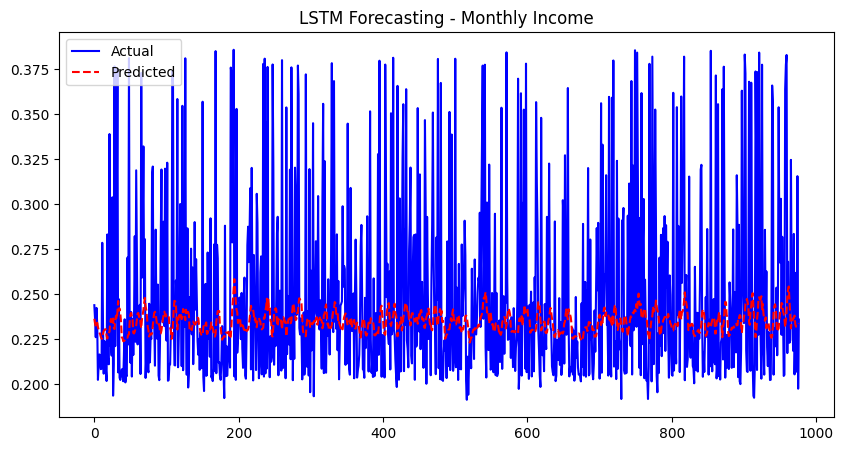

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Converting dataset to time-series format
time_series_data = data[['MonthlyIncome']].values
time_series_data = time_series_data.reshape(-1, 1)

# Create sequences for LSTM
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X_ts, y_ts = create_sequences(time_series_data, seq_length)

# Train-test split
train_size = int(len(X_ts) * 0.8)
X_train_ts, X_test_ts = X_ts[:train_size], X_ts[train_size:]
y_train_ts, y_test_ts = y_ts[:train_size], y_ts[train_size:]

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train_ts, y_train_ts, epochs=20, batch_size=16, validation_data=(X_test_ts, y_test_ts))
y_pred_ts = model_lstm.predict(X_test_ts)

# Plot Results
plt.figure(figsize=(10,5))
plt.plot(y_test_ts, label="Actual", color='blue')
plt.plot(y_pred_ts, label="Predicted", color='red', linestyle='dashed')
plt.legend()
plt.title("LSTM Forecasting - Monthly Income")
plt.show()
